### Easy

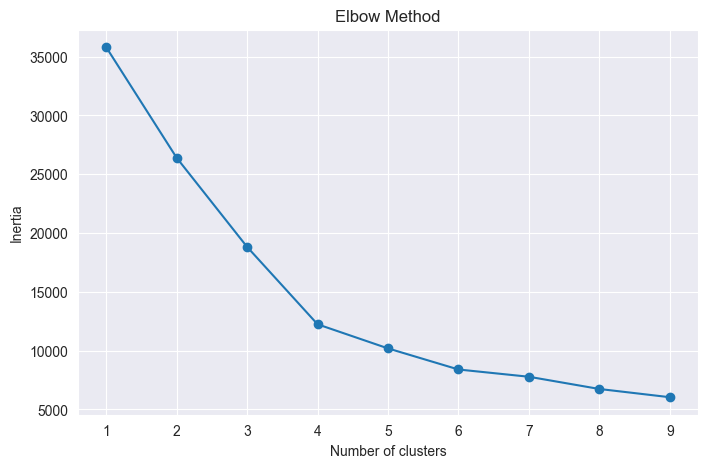

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../data/data.csv')

features = ['PURCHASES', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'ONEOFF_PURCHASES']

for feature in features:
    data[feature] = data[feature].fillna(data[feature].median())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

scores = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Implemented "Elbow" method to calculate the optimal number of clusters. It appears that 4 - is a great option.
Seems credible to clusterize by PURCHASES, PAYMENTS, PRC_FULL_PAYMENT, ONEOFF_PURCHASES features

### Normal

In [181]:
import numpy as np

dbscan_results = []
for eps in np.linspace(0.1, 1, 10):
    for n in range(1, 10):
        model = DBSCAN(eps=eps, min_samples=n)
        dbs_labels = model.fit_predict(scaled_data)
        dbscan_results.append({'eps': eps, 'min_samples': n, 'n_clusters': len(np.unique(dbs_labels)),
                               'score': silhouette_score(scaled_data, dbs_labels)})

dbscan_results = pd.DataFrame(dbscan_results)
dbscan_results.sort_values('n_clusters', ascending=False)

,eps,min_samples,n_clusters,score
0,0.1,1,1928,-0.125119
9,0.2,1,898,0.025133
18,0.3,1,543,-0.021854
27,0.4,1,309,0.111608
1,0.1,2,255,-0.099585
...,...,...,...,...
77,0.9,6,2,0.814622
62,0.7,9,2,0.770742
41,0.5,6,2,0.744186
53,0.6,9,2,0.755686


KMeans: 0.6167277902177284
Agglomerative Clustering: 0.5921486606179959
DBSCAN: 0.6695943761594255


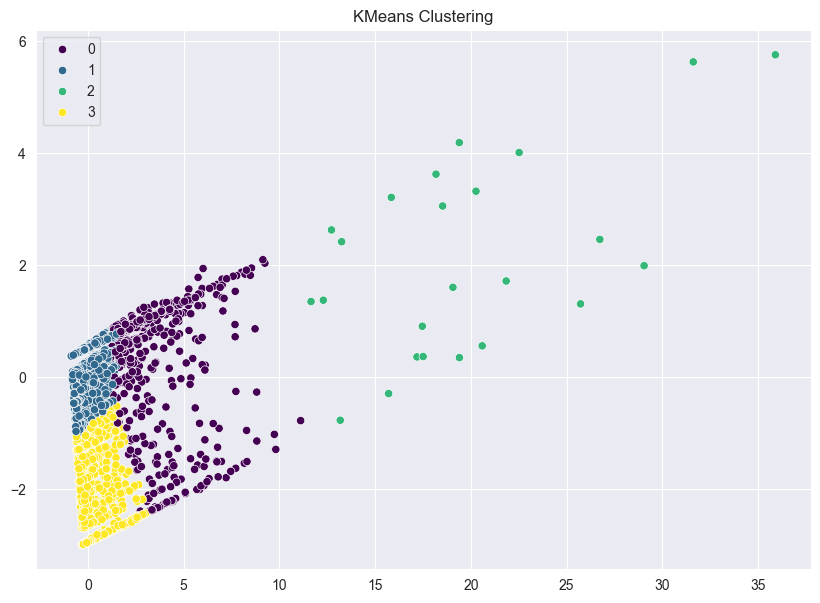

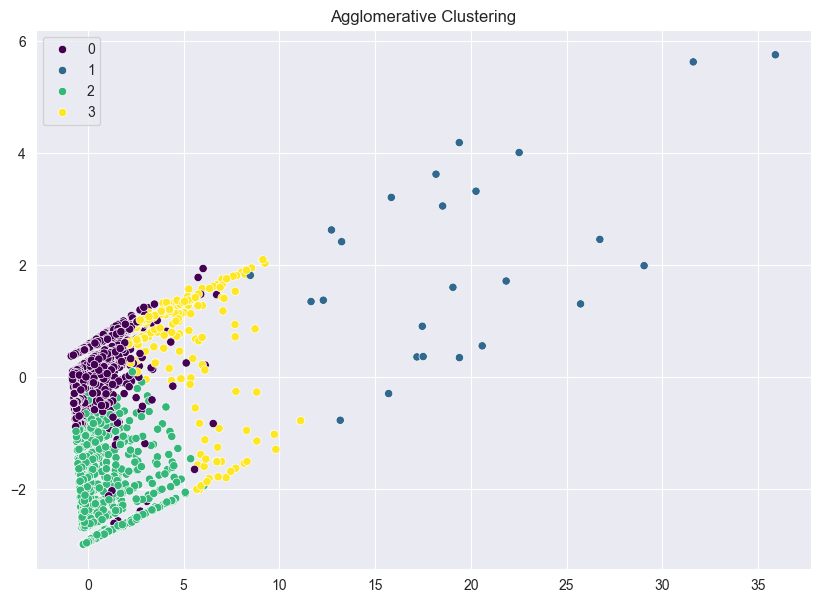

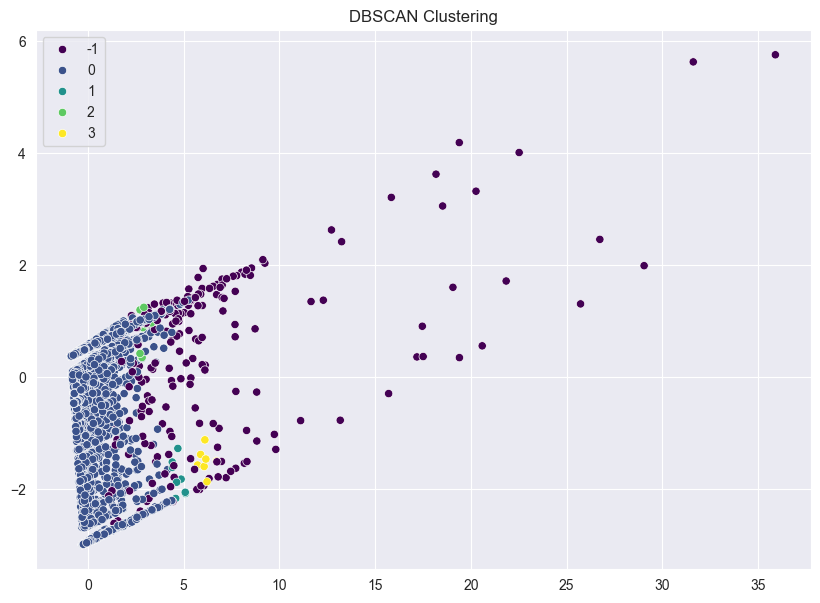

In [182]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_score = silhouette_score(scaled_data, kmeans_labels)

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(scaled_data)
agg_score = silhouette_score(scaled_data, agg_labels)

dbs = DBSCAN(eps=0.7, min_samples=7)
dbs_labels = dbs.fit_predict(scaled_data)
dbs_score = silhouette_score(scaled_data, dbs_labels)

print(f'KMeans: {kmeans_score}')
print(f'Agglomerative Clustering: {agg_score}')
print(f'DBSCAN: {dbs_score}')


def plot_clusters(x, labels, title):
    pca = PCA(4)
    pca_data = pca.fit_transform(x)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='viridis', legend='full')
    plt.title(title)
    plt.show()


plot_clusters(scaled_data, kmeans_labels, 'KMeans Clustering')
plot_clusters(scaled_data, agg_labels, 'Agglomerative Clustering')
plot_clusters(scaled_data, dbs_labels, 'DBSCAN Clustering')

data['Cluster'] = kmeans_labels
cluster_summary = data.groupby('Cluster')[features].mean()

According to the generated visual, DBSCAN is barely applicable in this task. The nature of data suggests that there will be no clear border between users from different 